# SImple Image Classifier
Using Keggel Dog and Cat data set <br>
based on: Udemy DEEP LEARNING A-Z™ Course

### Importing the libraries

In [85]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# will need this for the image augmentation
from keras.preprocessing.image import ImageDataGenerator 
# for fine tuning
from keras.layers import Dropout

# to save check points
from keras.callbacks import ModelCheckpoint

# Hyper Parameters

In [86]:
batchSize = 64
targetSize = 256

### Initializing the CNN

In [87]:
classifier = Sequential()
# First doing the Convolutions
classifier.add(Convolution2D(filters = 32,kernel_size =(3,3),input_shape=(targetSize,targetSize,3),activation ='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# 2 adding another conv. layer for better performance
classifier.add(Convolution2D(filters = 64,kernel_size =(3,3),activation ='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# 3 adding another conv. layer for better performance
classifier.add(Convolution2D(filters = 64,kernel_size =(3,3),activation ='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# 4 adding another conv. layer for better performance
classifier.add(Convolution2D(filters = 64,kernel_size =(3,3),activation ='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# 5 adding another conv. layer for better performance
classifier.add(Convolution2D(filters = 64,kernel_size =(3,3),activation ='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


classifier.add(Flatten())

# From now, it's a classic ANN, fully connected layer
classifier.add(Dropout(rate = 0.6))
               
classifier.add(Dense(units = 256, activation='relu'))
classifier.add(Dropout(rate = 0.5))

classifier.add(Dense(units = 128, activation='relu'))
classifier.add(Dropout(rate = 0.2))

classifier.add(Dense(units = 1,activation='sigmoid'))

# Compiling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

### Training
We will use the Keras library to do the training
But we should do the image augmentation, which is preventing from over fitting!<br>
Basically it makes a lot of batches of images with random transformation on the image and makes a much larger dataset to be trained on. <br>
https://keras.io/preprocessing/image/

In [115]:
%%time
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(
        rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(targetSize, targetSize),
    batch_size=batchSize,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(targetSize, targetSize),
    batch_size=batchSize,
    class_mode='binary')

checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=True)

classifier.fit_generator(
    training_set,
    max_queue_size=10,
    workers = 10,
    steps_per_epoch=8000/batchSize,
    epochs=25,
    validation_data=test_set,
    validation_steps=2000/batchSize)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
125/125 [==============================] - 35s 279ms/step - loss: 0.0871 - acc: 0.9677 - val_loss: 0.2489 - val_acc: 0.9315
Epoch 2/25
125/125 [==============================] - 31s 248ms/step - loss: 0.0732 - acc: 0.9701 - val_loss: 0.1977 - val_acc: 0.9515
Epoch 3/25
125/125 [==============================] - 31s 248ms/step - loss: 0.0792 - acc: 0.9720 - val_loss: 0.1613 - val_acc: 0.9430
Epoch 4/25
125/125 [==============================] - 31s 249ms/step - loss: 0.0820 - acc: 0.9671 - val_loss: 0.1575 - val_acc: 0.9450
Epoch 5/25
125/125 [==============================] - 31s 250ms/step - loss: 0.0805 - acc: 0.9686 - val_loss: 0.1745 - val_acc: 0.9420
Epoch 6/25
125/125 [==============================] - 31s 249ms/step - loss: 0.0829 - acc: 0.9682 - val_loss: 0.1632 - val_acc: 0.9375
Epoch 7/25
125/125 [==============================] - 31s 249ms/step - loss: 0.0822 - acc: 0.9682 - val_lo

# Test
### Import libraries

In [116]:
import numpy as np
from keras.preprocessing import image

### Import and Manage image dimensions
Import an image, as an image

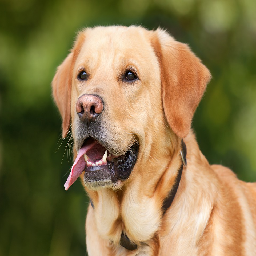

In [117]:
testImage = image.load_img("dataset/single_prediction/cat_or_dog_1.jpg",
                           target_size = (targetSize,targetSize))
testImage

In [118]:
testImage = image.img_to_array(testImage)
# check the dimensions
print(testImage.shape)
# We need to change the dimension to match the batch
testImage = np.expand_dims(testImage, axis= 0)

(256, 256, 3)


### Predict

In [119]:
%%time
pred = classifier.predict(testImage)
print (pred)
print(training_set.class_indices)

[[ 1.]]
{'cats': 0, 'dogs': 1}
Wall time: 578 ms


In [120]:
classifier.save('good9545.h5')